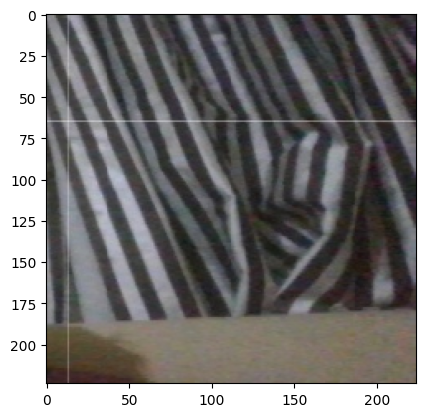

(1, 224, 224, 3)
1/1 [==============================] - 0s 167ms/step
5.450717
2
The card is 


In [6]:
# Import the necessary modules
from tensorflow.keras.models import load_model  # To load a trained model
import os  # To interact with the file system
import matplotlib.pyplot as plt  # To display images
from tensorflow.keras.preprocessing import image  # To preprocess images
import time  # To measure time
import numpy as np  # For numerical operations
import cv2  # For image processing and computer vision


# Open the default camera
cap = cv2.VideoCapture(1)

# Check if the camera is opened successfully
if not cap.isOpened():
    print("Error opening camera")
else:
    # Show live video for 10 seconds
    start_time = time.time()
    while time.time() - start_time < 10:
        # Read a frame from the camera
        ret, frame = cap.read()

        # Check if frame is read successfully
        if not ret:
            print("Error reading frame")
            break

        # Display the live video
        cv2.imshow('Live Video', frame)

        # Wait for 1 millisecond and check if 'q' key is pressed
        if cv2.waitKey(1) == ord('q'):
            break

    # Capture a photo after 10 seconds
    ret, photo = cap.read()

    # Save the photo as a JPEG file
    if ret:
        cv2.imwrite("C:/Users/jithu/Desktop/PDE4434/image/test.jpeg", photo)

    # Load the saved image and resize it
    img = image.load_img("C:/Users/jithu/Desktop/PDE4434/image/test.jpeg", target_size=(500, 500))

    # Release the camera and close all windows
    cap.release()
    cv2.destroyAllWindows()



# Load image in color
img_colour = cv2.imread('C:/Users/jithu/Desktop/PDE4434/image/test.jpeg')

# Convert image to grayscale
img = cv2.cvtColor(img_colour, cv2.COLOR_BGR2GRAY)

# Apply smoothing to the image
img_sm = cv2.blur(img, (5, 5))

# Apply thresholding to the image
thr_value, img_th = cv2.threshold(img_sm, 110, 255, cv2.THRESH_BINARY)

# Apply morphology correction to the thresholded image
kernel = np.ones((5, 5), np.uint8)
img_close = cv2.morphologyEx(img_th, cv2.MORPH_OPEN, kernel)

# Apply edge detection to the closed image
img_canny = cv2.Canny(img_close, 50, 200)

# Find contours on the closed image
contours, hierarchy = cv2.findContours(img_close, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)



# Loop through all the contours
imgc = cv2.imread('C:/Users/jithu/Desktop/PDE4434/image/test.jpeg')
max_area = 0
max_contour = None
for i, c in enumerate(contours):
    
    # Get the area of the contour
    area = cv2.contourArea(c)
    if area > max_area:
        max_area = area
        max_contour = c
    
    # Get the perimeter of the contour
    perimeter = cv2.arcLength(c, True)
    
    # Approximate the contour with a polygon
    epsilon = 0.001*perimeter
    vertex_approx = len(cv2.approxPolyDP(c, epsilon, True))
    
    # Label the contour with its index
    cv2.putText(imgc, str(i), (c[0, 0, 0]+20, c[0, 0, 1]+30), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 255))
    
    # If the contour has only 4 vertices, draw a bounding rectangle around it
    if vertex_approx == 4:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(imgc, (x,y), (x+w,y+h), (0, 0, 255), 2)

# If a contour with the maximum area is found, crop it from the original image and save it
if max_contour is not None:
    x,y,w,h = cv2.boundingRect(max_contour)
    contour_img = img_colour[y:y+h, x:x+w]
    cv2.imwrite('C:/Users/jithu/Desktop/pde4434/images/Test1.jpeg', contour_img)


# Load pre-trained CNN model from file
model = load_model("uno number1-cnn.h5")

# Set directory where UNO card images are located
path = "images"

# Loop through each image in the directory
for img in os.listdir(path):
    
    # Load the image and resize it to 224x224 pixels
    img = image.load_img(path+"/"+img, target_size=(224,224))
    
    # Display the image in a new window
    plt.imshow(img)
    plt.show()
    
    # Convert the image to a numpy array and expand its dimensions
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    print(x.shape)
    images = np.vstack([x])
    
    # Use the pre-trained model to predict the type of UNO card in the image
    pred = model.predict(images, batch_size=0)
    
    # Define the list of possible UNO card types
    nameList = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'Draw 2', 'Reverse', 'NO CARD DETECTED', 'Wild card', 'Wild card draw 4', 'Skip']
    
    # Determine the maximum probability value in the predicted distribution
    pVal = max(pred[0])
    print(pVal)
    
    # Find the index in the predicted distribution corresponding to the maximum probability
    maxIndex = 0
    for i in pred[0]:
        if i==pVal:
            break
        maxIndex += 1
    
    # Use the index to identify the predicted card type from the nameList
    print(nameList[maxIndex])



# Read the image file and convert it to the HSV color space
image = cv2.imread('C:/Users/jithu/Desktop/pde4434/images/Test1.jpeg')
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color ranges for each of the cards
color_ranges = {
    '': ((0, 0, 0), (50, 50, 50)),  # For black/wild card
    'blue': ((90, 100, 100), (130, 255, 255)),
    'green': ((40, 100, 100), (80, 255, 255)),  
    'yellow': ((20, 100, 100), (40, 255, 255)),  
    'red': ((0, 100, 100), (20, 255, 255))  
}

# Iterate through each color range and find the pixels within that range
for color, (lower, upper) in color_ranges.items():
    # Create a binary mask for the pixels within the color range
    mask = cv2.inRange(hsv_image, np.array(lower), np.array(upper))
    
    # Count the number of non-zero pixels in the mask
    count = cv2.countNonZero(mask)
    
    # Print the color of the card if enough pixels are detected in the range
    if count > 100:
        print(f"The card is {color}")
        break


#Set the font style
font = cv2.FONT_HERSHEY_SIMPLEX

while True:

# Read in the frame from the video feed
    frame = cv2.imread("C:/Users/jithu/Desktop/pde4434/image/Test.jpeg")

# Add text to the frame indicating the detected card color
    cv2.putText(frame, f"The card is {color}", (50, 50), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

# Add text to the frame indicating the predicted name associated with the card
    cv2.putText(frame, nameList[maxIndex], (50, 100), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

# Display the resulting frame
    cv2.imshow('Result', cv2.resize(frame, (640, 480)))

# Wait for the 'q' key to be pressed to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release and close all windows
cap.release()
cv2.destroyAllWindows()








